In [1]:
from dataclasses import asdict
import networkx as nx

from gg_project.vertex_params import VertexType, VertexParams
from gg_project.productions.p5 import Production5
from gg_project.vis import draw

In [2]:
def mk_vertex(t, pos, level):
    return asdict(VertexParams(vertex_type=t, position=pos, level=level))

In [3]:
p5 = Production5()

In [4]:
def _get_node(nr: int, vertex_type: VertexType, position: tuple[float, float], level: int):
    return (
               nr,
               asdict(
                   VertexParams(vertex_type=vertex_type, position=position, level=level)
               ),
           )

In [5]:
graph = nx.Graph()
graph.add_nodes_from([
    _get_node(0, vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1),
    _get_node(1, vertex_type=VertexType.EXTERIOR, position=(0.0, 0.5), level=1),
    _get_node(2, vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1),
    _get_node(3, vertex_type=VertexType.EXTERIOR, position=(0.5, 1.0), level=1),
    _get_node(4, vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1),
    _get_node(5, vertex_type=VertexType.EXTERIOR, position=(0.5, 0.5), level=1),
    _get_node(6, vertex_type=VertexType.INTERIOR, position=(1/3, 2/3), level=1)
])

graph.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 0),

    (6, 0),
    (6, 2),
    (6, 4)
])

In [6]:
isomorphic_subgraph1 = p5.find_isomorphic_to_left_side(graph)

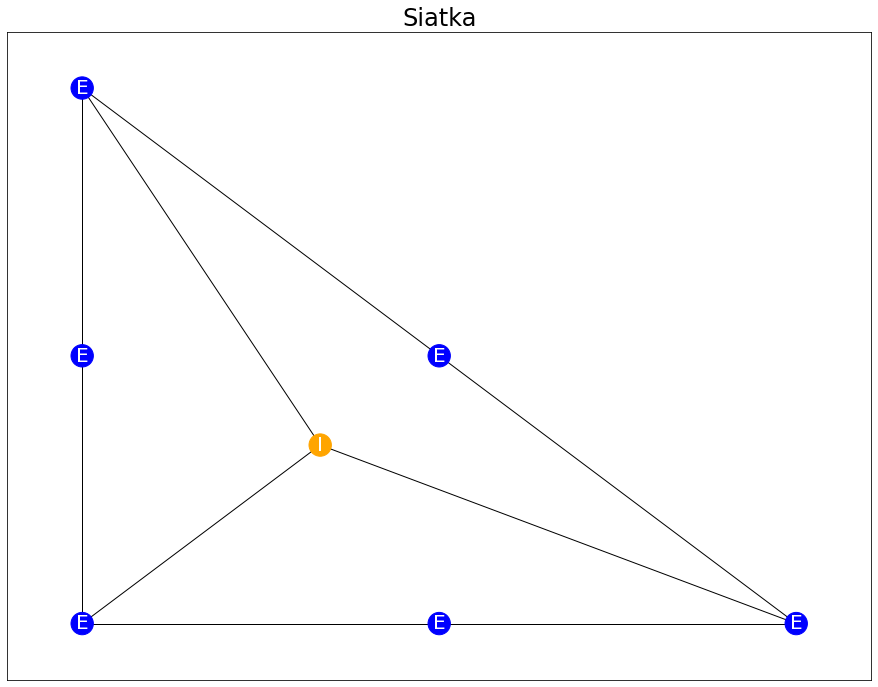

In [7]:
draw(isomorphic_subgraph1, figsize=(12, 9))

In [8]:
p1_after_first_p2 = p5.apply(graph, isomorphic_subgraph1)

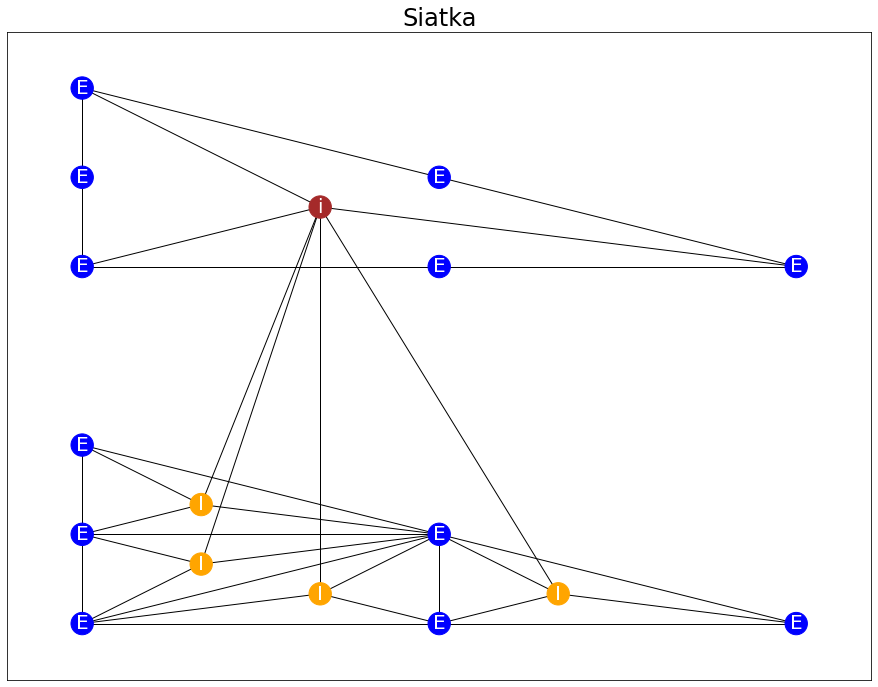

In [9]:
draw(p1_after_first_p2, figsize=(12, 9))